# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [6]:
#install spacy in the current conda environment
!pip install spacy


In [7]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------- ------------ 8.9/12.8 MB 39.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 36.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
!pip install matplotlib

In [9]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [10]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [11]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [12]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [13]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [14]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [15]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [16]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [17]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [18]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

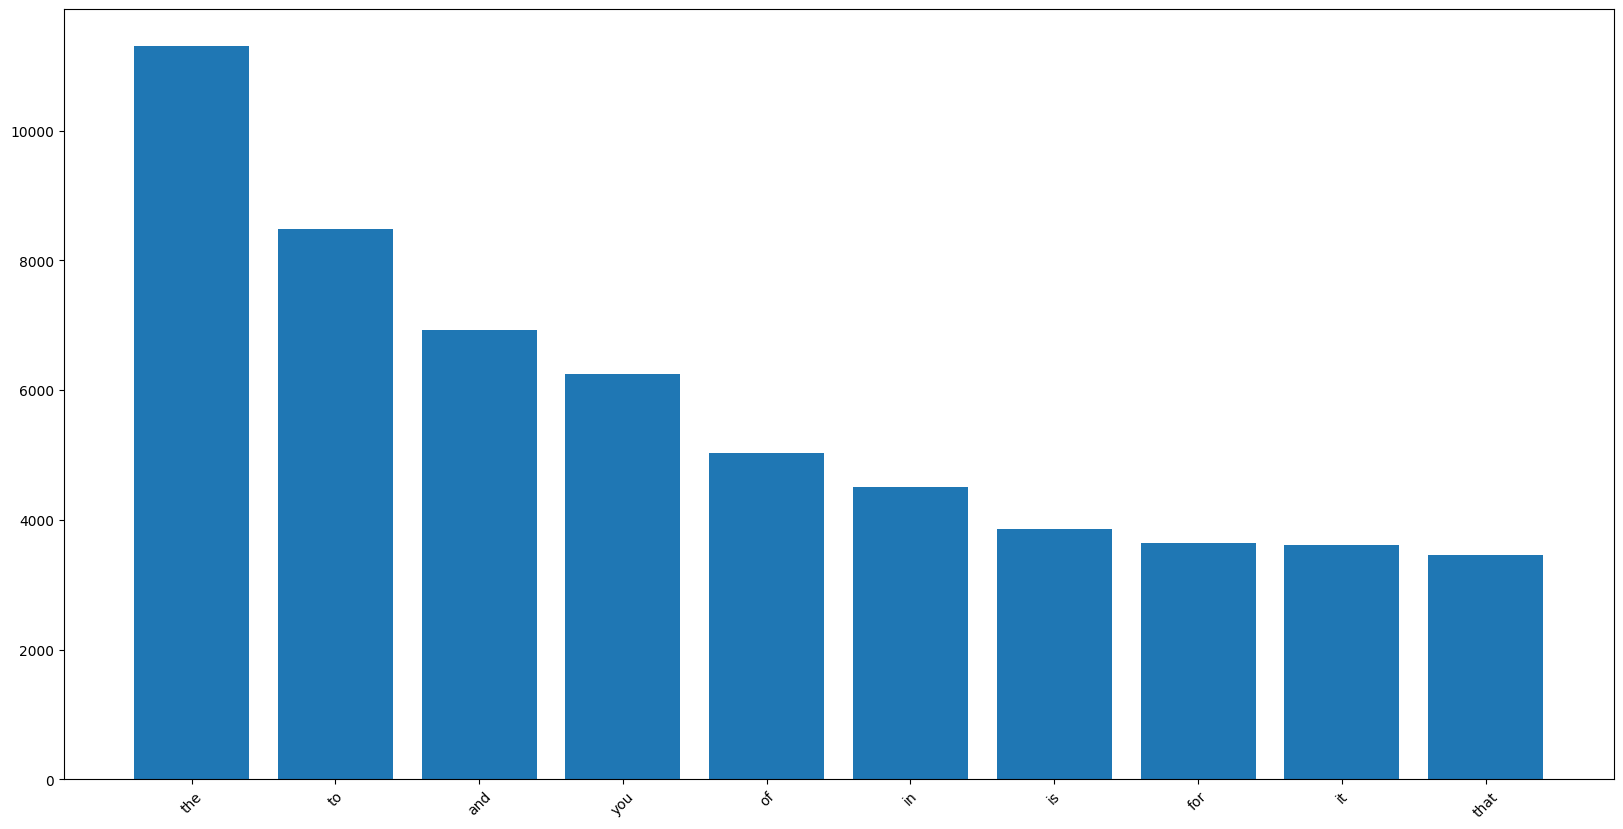

In [20]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

**Answer here: The words in the plot are all just words that are extremely common in the English language in general, such as "the", "to", "and", etc... This is not very useful for studying because it doesn't show the unique words that are most common to our specific dataset and only the literal most common words.**

#### Lemmatization and stopword removal

In [21]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [22]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [23]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [24]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [25]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts.head(10)

not        2862
student    1183
like       1183
people     1124
class       988
good        820
think       801
time        774
year        761
go          735
dtype: int64

In [26]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

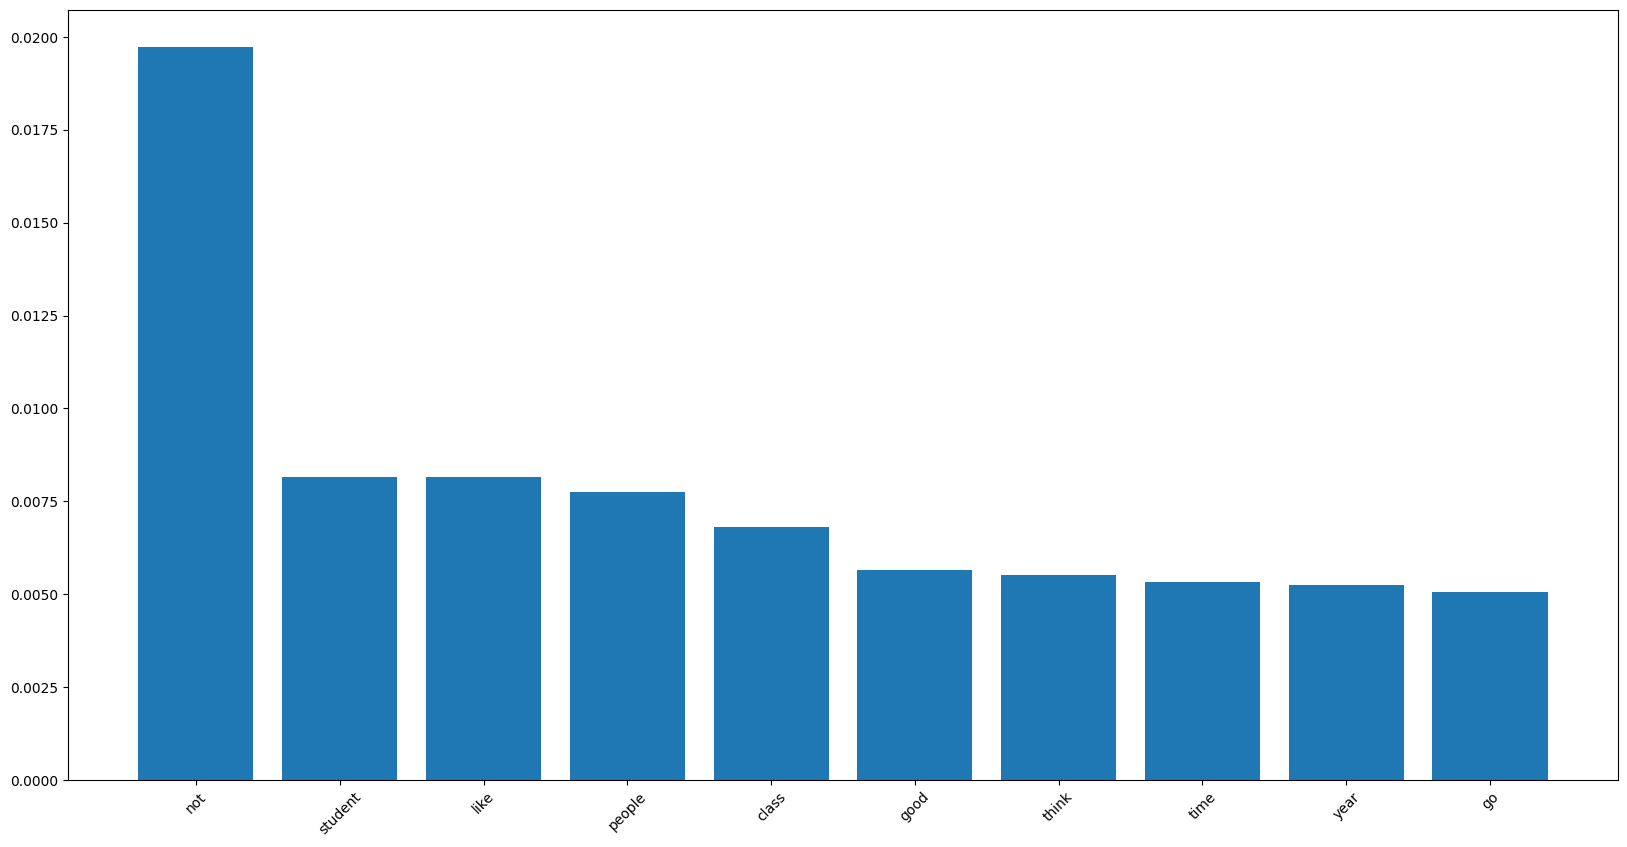

In [27]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [28]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [29]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

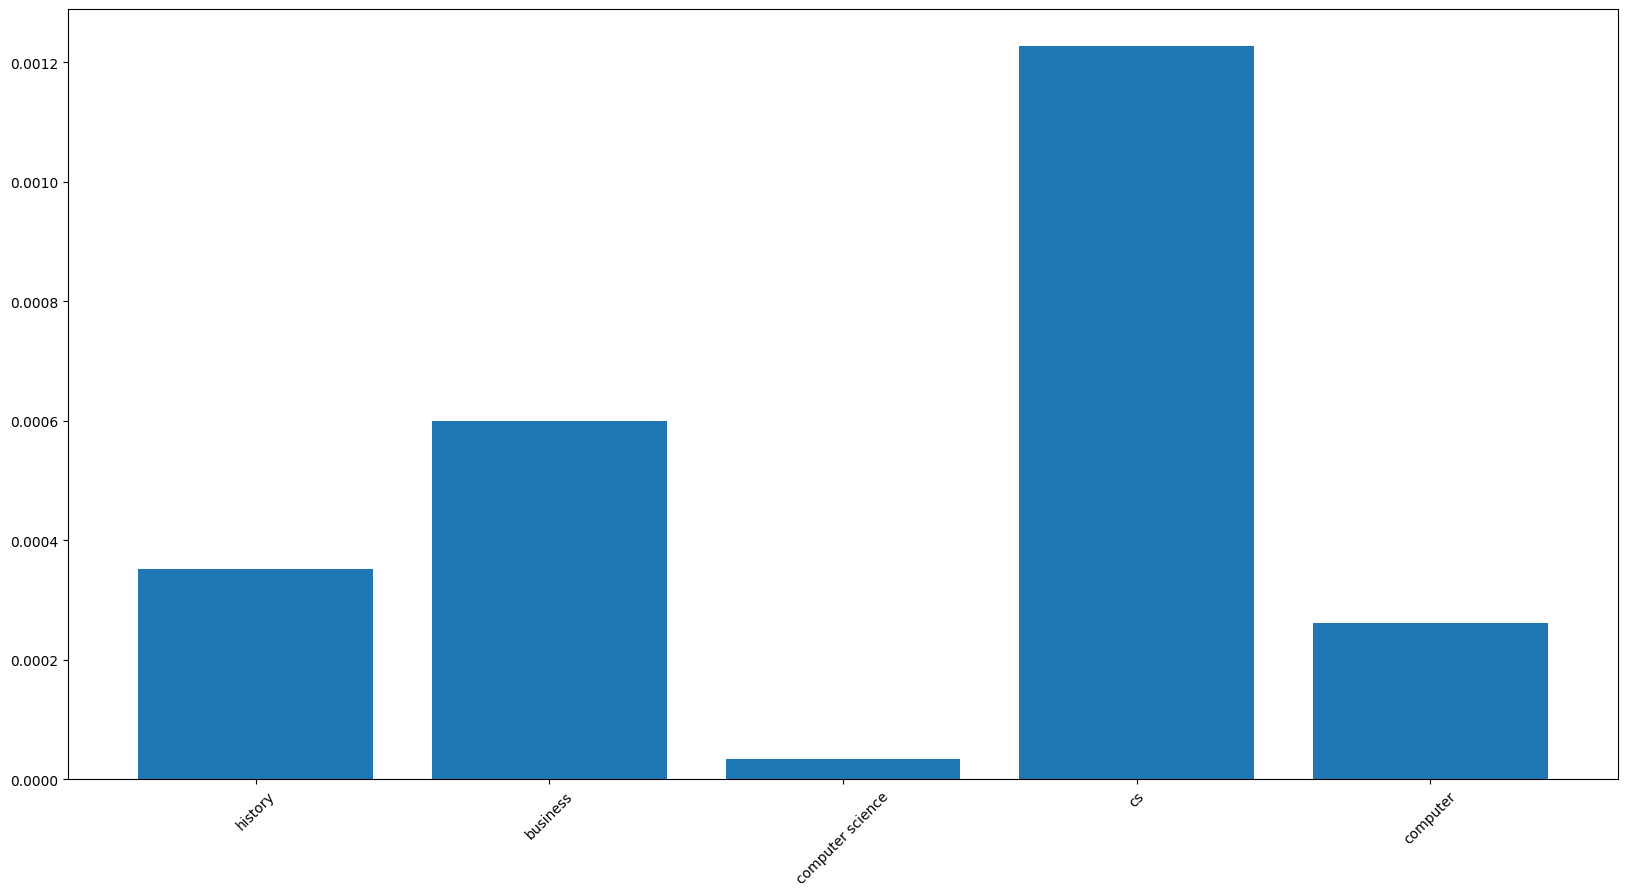

In [30]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [31]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
plot_list_interest=word_counts[["football", "baseball", "basketball", "soccer", "hockey"]]
plot_list_interest

football      0.000276
baseball      0.000034
basketball    0.000034
soccer        0.000034
hockey        0.000041
dtype: float64

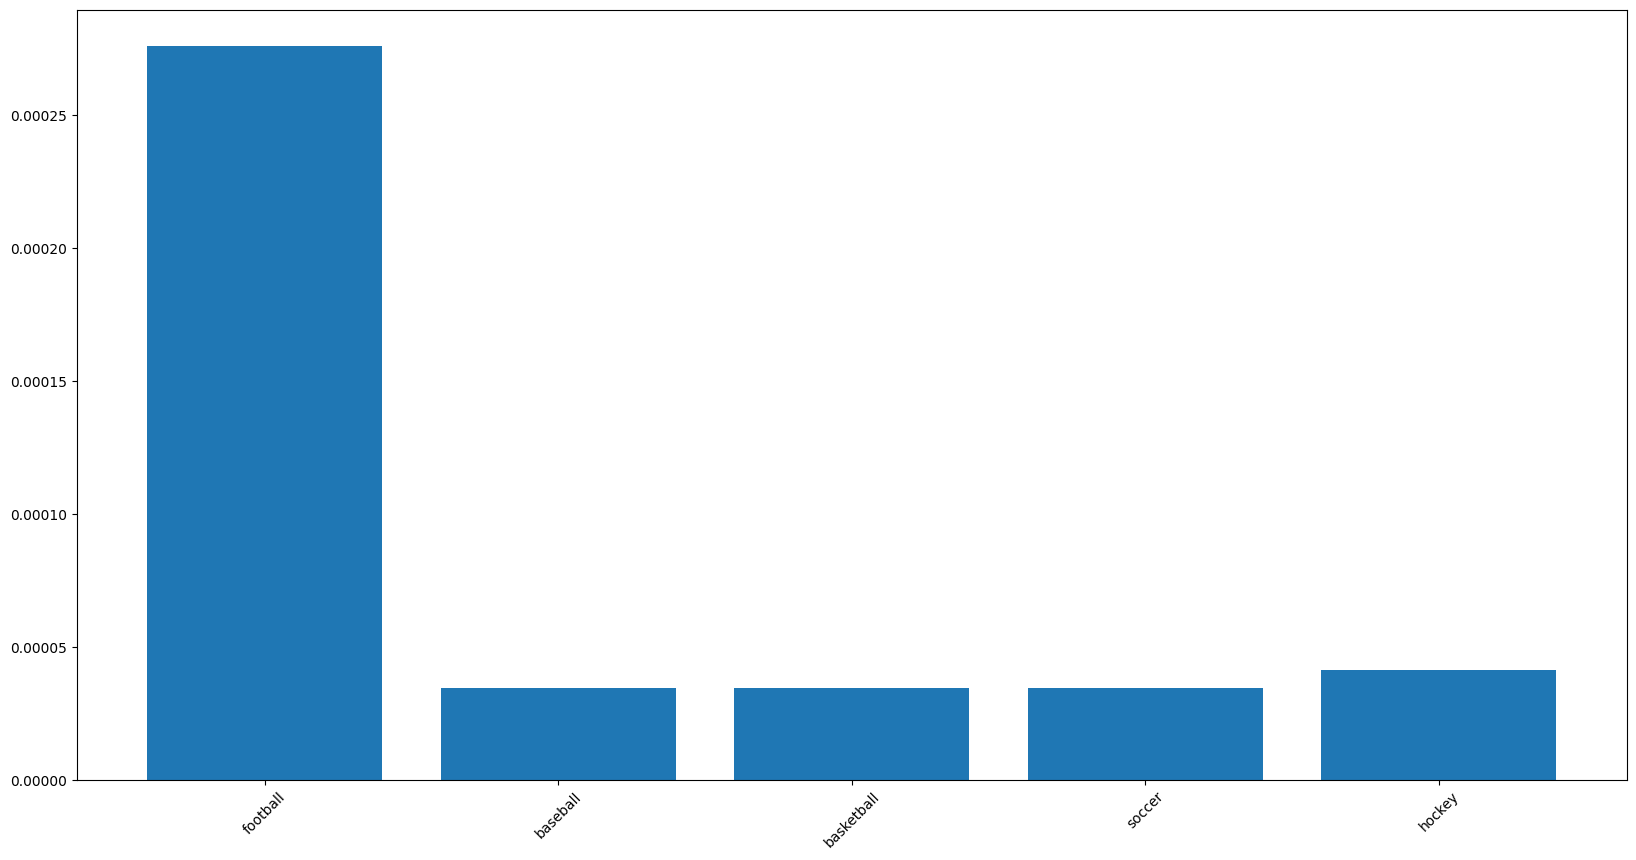

In [32]:
plt.figure(figsize=(20,10))
plt.bar(plot_list_interest.index, plot_list_interest.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

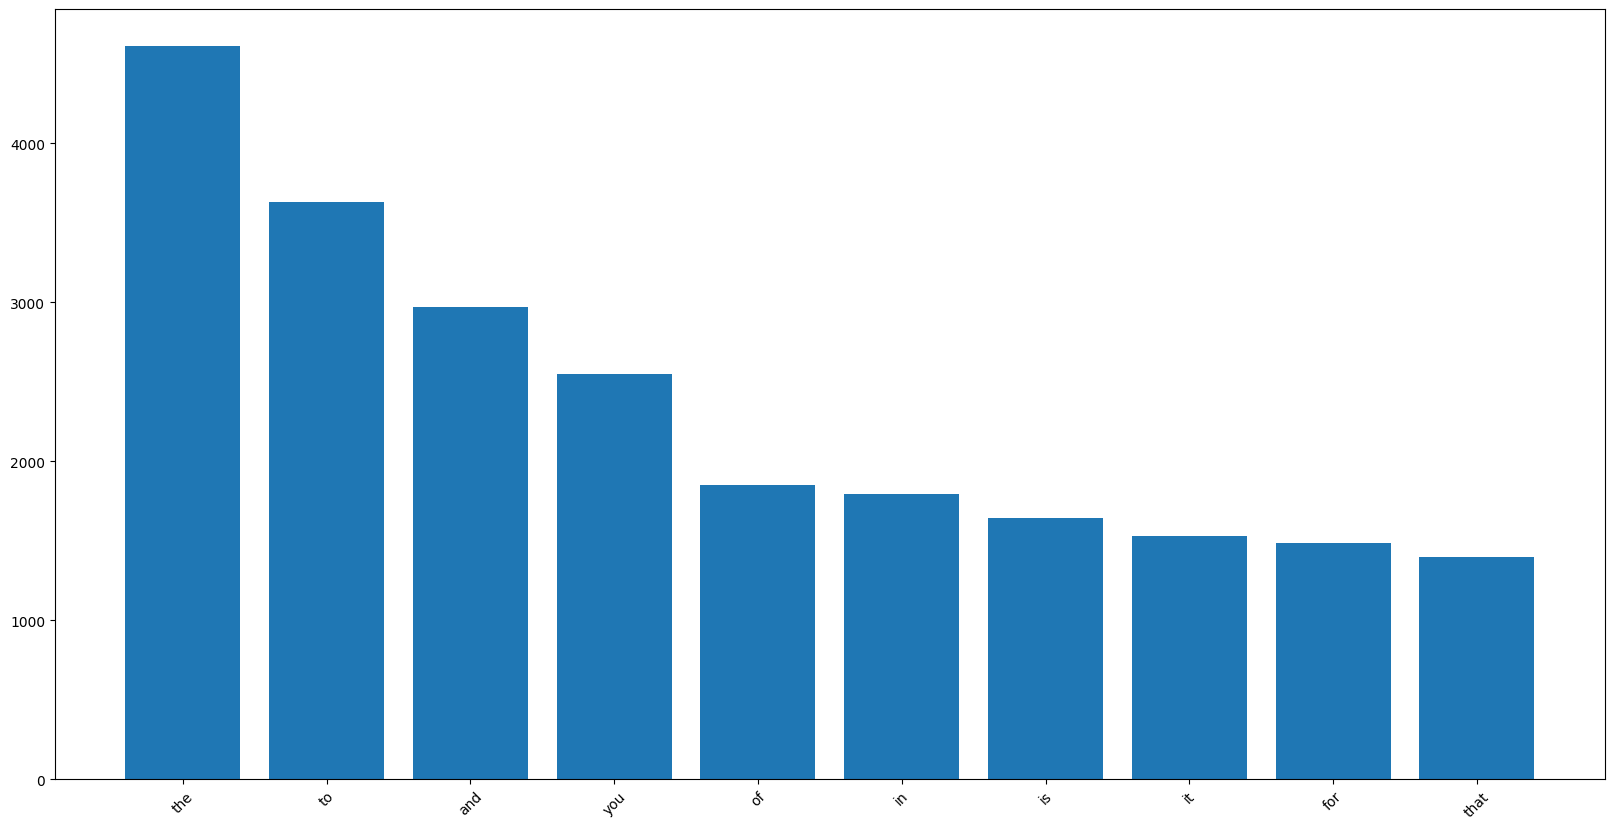

In [33]:
#Shows bar graph including stopwords
uiuc=pd.read_csv("uiuc.csv") 
uiuc['cleaned_text'] = uiuc['text'].apply(clean) 
vectorizer = CountVectorizer()
bag_of_words2 = vectorizer.fit_transform(uiuc['cleaned_text']) 
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out()) 
word_counts2 = bow_df2.sum() 
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2 = word_counts2.head(10) 
plt.figure(figsize=(20,10))
plt.bar(word_counts2.index, word_counts2.values)
plt.xticks(rotation=45)
plt.show() 


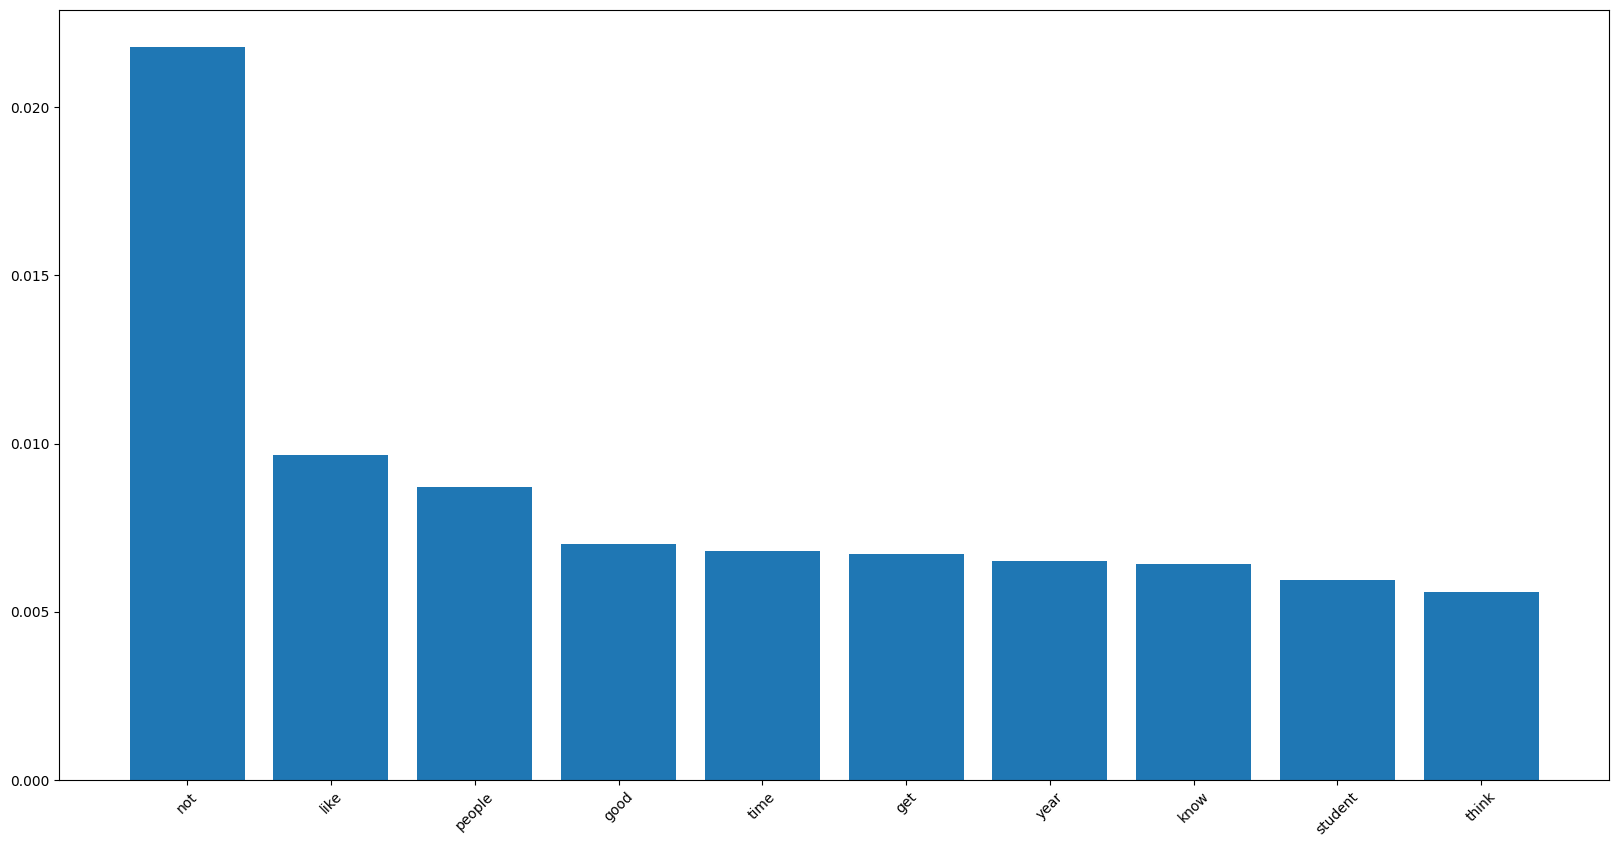

In [34]:
#shows bar graph excluding stopwords
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words2 = vectorizer.fit_transform(uiuc['lemmatized_text']) 
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2 = word_counts2 / word_counts2.sum() 
plot_list2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()


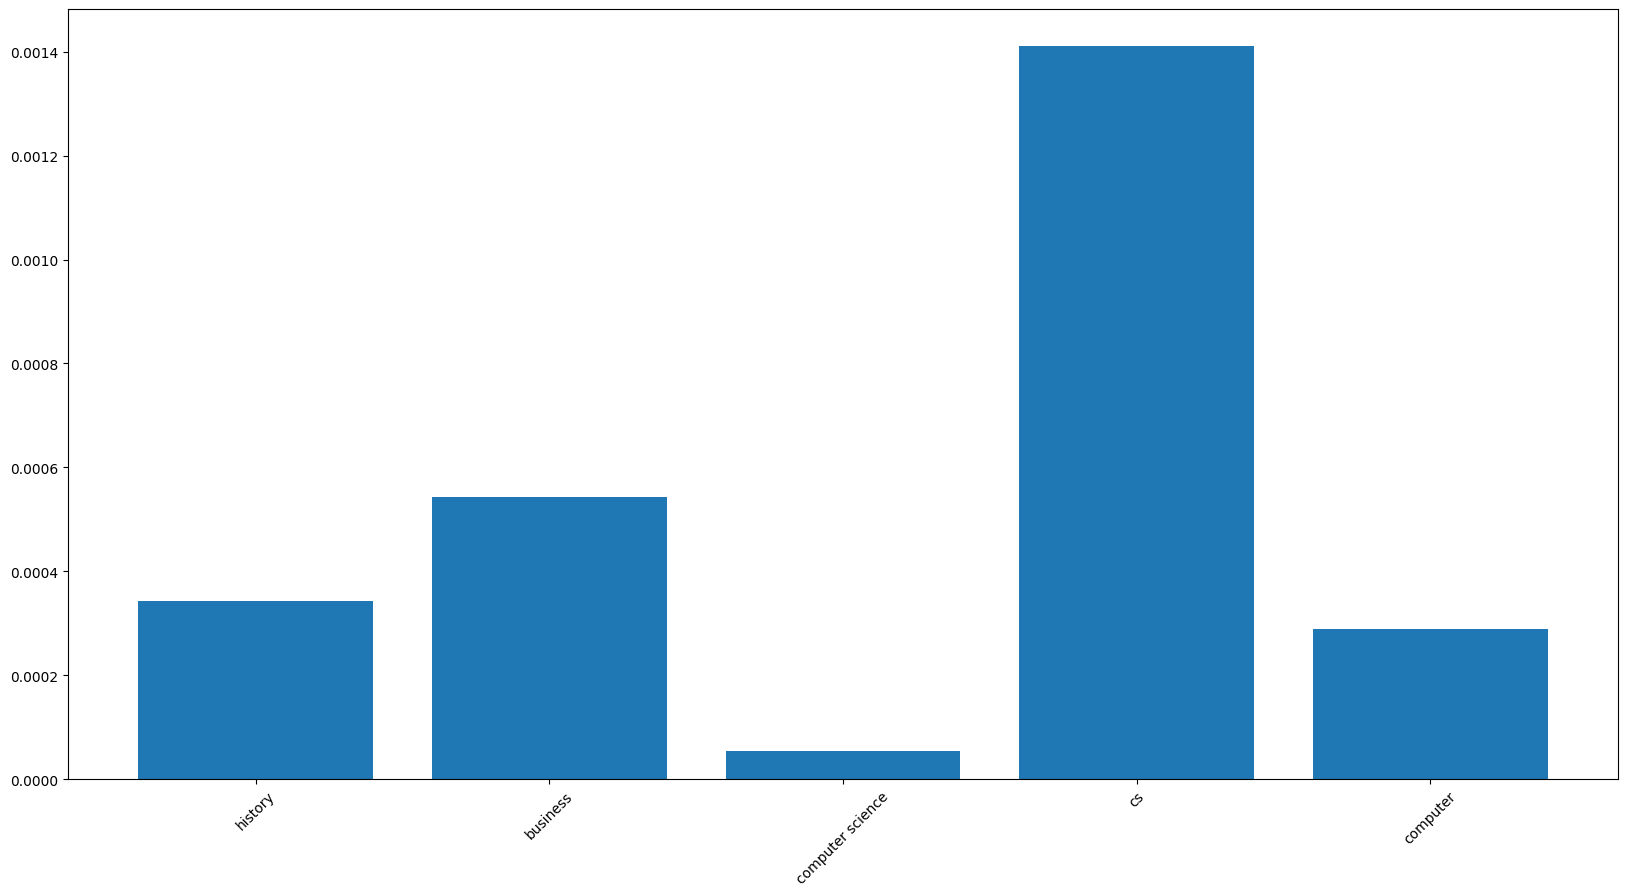

In [35]:
#bar graph with 5 words 
word_counts2 = word_counts2 / word_counts2.sum() 
plot_list2=word_counts2[["history", "business", "computer science", "cs", "computer"]]
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

#### **When comparing the differences of the 5 words between the 2 datasets, I noticed that "cs" was more common in the uiuc dataset and that "business" was slightly more common in the umich dataset.**

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [36]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [37]:
#clean and lemmatize the data csv 
data['cleaned_text'] = data['text'].apply(clean) 
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [38]:
#create a bag of words representation with count vectorizer 
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2)) 
bag_of_words = vectorizer.fit_transform(data['lemmatized_text']) 
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts.head(10)

not        2767
like       1217
people     1140
student    1014
good        865
class       848
time        821
year        789
think       776
get         767
dtype: int64

In [39]:
#train a logistic regression model using the bag of words features as X and the label column as y 
from sklearn.linear_model import LogisticRegression 
X = bag_of_words
y = data['label']

model = LogisticRegression()
model.fit(X, y) 

LogisticRegression()

In [40]:
#report the accuracy of the model 
model.score(X, y)

0.9031746031746032

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [41]:
from sklearn.model_selection import train_test_split

# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy


0.7142857142857143

#### **The accuracy of the model was 72.96%, which is worse than the previous. I believe this is because previously the model was being scored on data it has already been trained on, so it knows the data very well compared to the test data that it has not seen.**

#### Part 3: Examine the top features of your model using the following code

In [42]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients



In [43]:

X_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())
coefficients = pd.DataFrame({'feature': X_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10) 



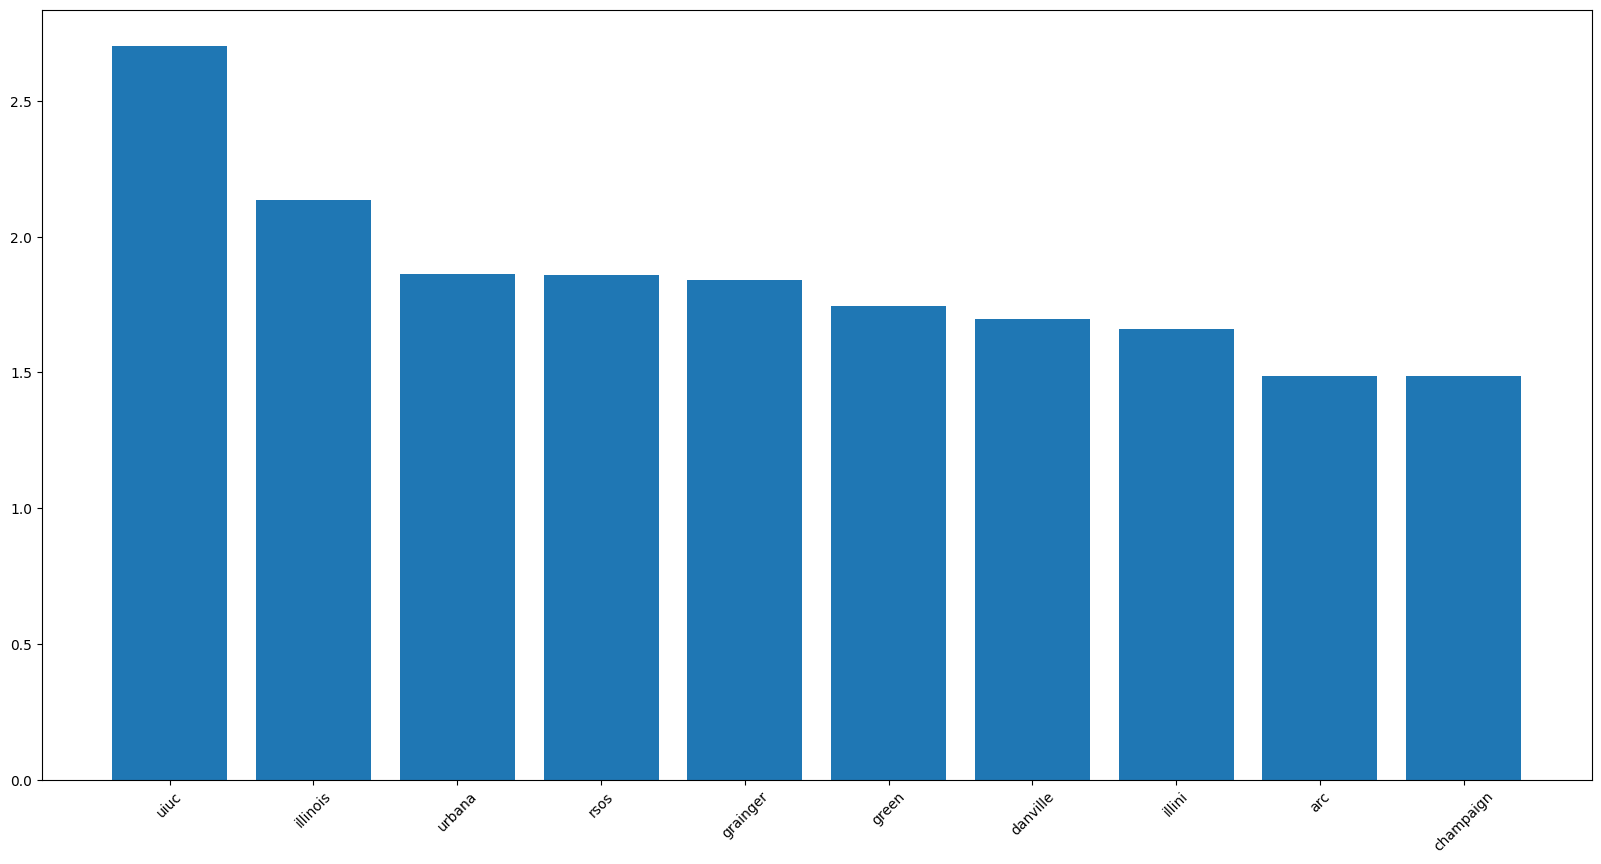

In [44]:
plt.figure(figsize=(20,10))
plt.bar(top_10_positive['feature'], top_10_positive['coefficient'])
plt.xticks(rotation=45)
plt.show()


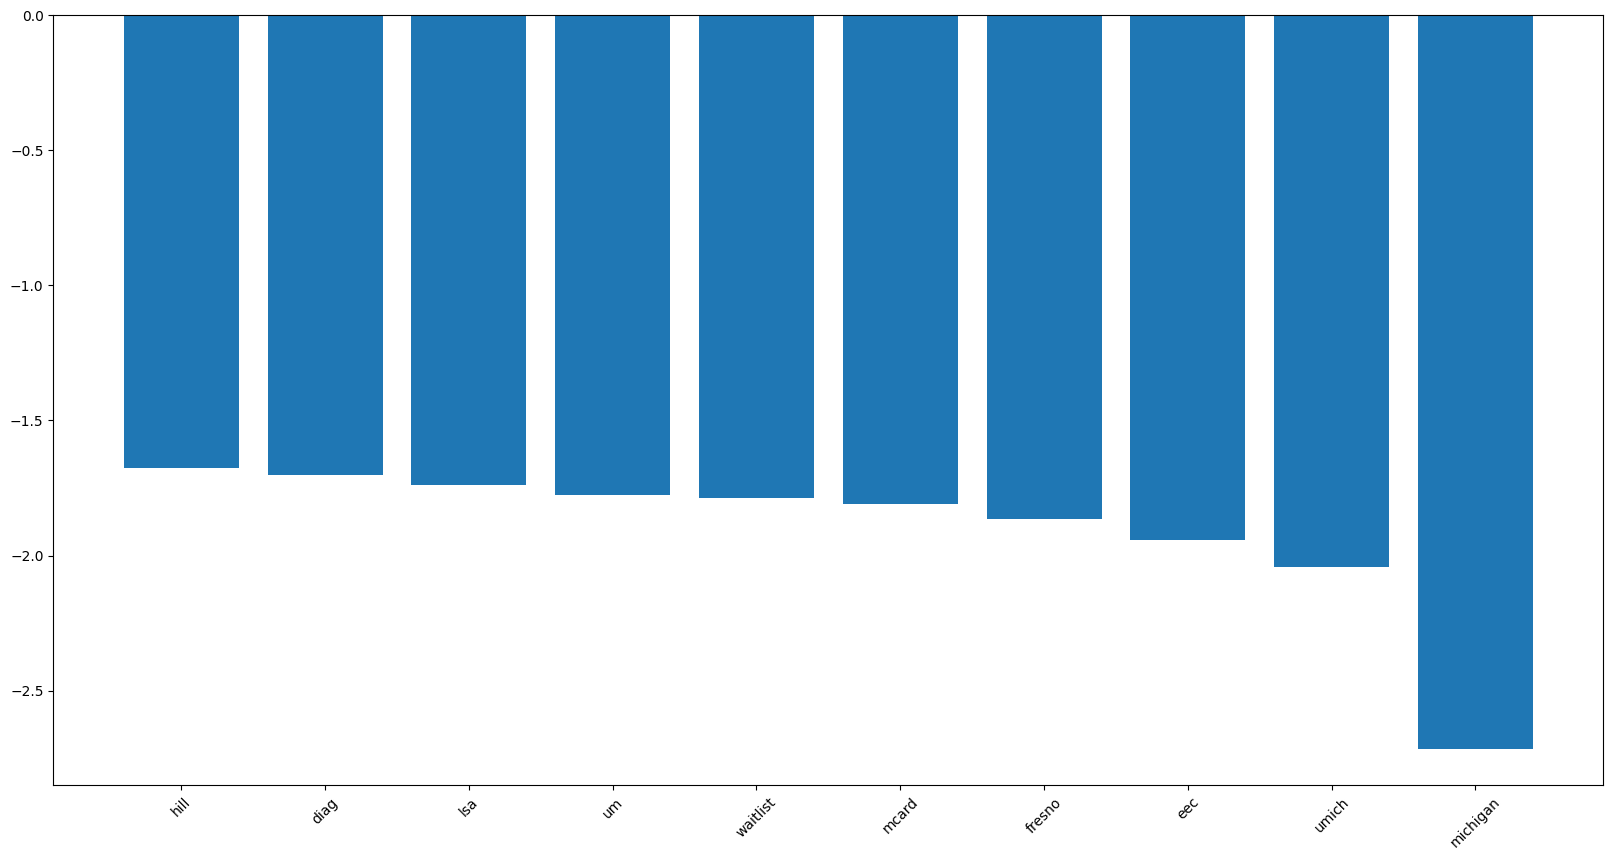

In [45]:
plt.figure(figsize=(20,10))
plt.bar(top_10_negative['feature'], top_10_negative['coefficient'])
plt.xticks(rotation=45)
plt.show()

In [46]:
#what do you notice about these words? Are they surprising or expected?
#examine these words and see if they make sense. Do they differentiate UIUC from another university? 

#### **I noticed that most of the positive words have something to do with Illinois/UIUC, while the negative words relate to other colleges/cities. The words make sense since the top positive words are specific to UIUC(champaign, uiuc, illini,...) and the bottom words relate to UMICH(michigan, umich, uofm) or othere places.**

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [47]:
!pip install gensim

In [50]:
# used Copilot for this part of code
import gensim
from gensim import corpora 
from gensim.utils import simple_preprocess 



#tokenize
comments = uiuc['text'].values
processed_comments = [simple_preprocess(comment, deacc=True) for comment in comments]

#Create a dictionary
dictionary = corpora.Dictionary(processed_comments)

# Create a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in processed_comments]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)

# top 10 words
topics = lda_model.print_topics(num_words=10)
print(topics)


[(0, '0.095*"thank" + 0.032*"enough" + 0.026*"id" + 0.022*"exactly" + 0.019*"dont" + 0.017*"tried" + 0.017*"confused" + 0.016*"love" + 0.015*"happy" + 0.013*"mean"'), (1, '0.057*"still" + 0.025*"new" + 0.023*"parking" + 0.022*"him" + 0.020*"last" + 0.018*"next" + 0.018*"down" + 0.017*"champaign" + 0.016*"during" + 0.016*"bus"'), (2, '0.056*"until" + 0.046*"didn" + 0.037*"internet" + 0.034*"idea" + 0.032*"grad" + 0.029*"month" + 0.029*"cs" + 0.028*"info" + 0.026*"super" + 0.023*"bro"'), (3, '0.059*"lol" + 0.025*"full" + 0.023*"question" + 0.023*"ok" + 0.023*"away" + 0.022*"buy" + 0.021*"second" + 0.021*"she" + 0.021*"bank" + 0.019*"ur"'), (4, '0.057*"router" + 0.038*"ethernet" + 0.025*"thanks" + 0.025*"dm" + 0.024*"having" + 0.023*"available" + 0.021*"half" + 0.020*"app" + 0.020*"bring" + 0.019*"town"'), (5, '0.045*"weeks" + 0.031*"leave" + 0.028*"night" + 0.028*"comes" + 0.027*"today" + 0.027*"heard" + 0.025*"called" + 0.022*"table" + 0.017*"care" + 0.012*"visit"'), (6, '0.046*"https" 

Themes for topics: 
* Topic 0 - emotions
* Topic 1 - directions
* Topic 2 - information technology
* Topic 3 - slang 
* Topic 4 - wifi 
* Topic 5 - schedule
* Topic 6 - UIUC websites
* Topic 7 - common words in English
* Topic 8 - common words in English 2
* Topic 9 - transaction


I used Copilot to find a few comments with high frequencies of each topic:

Topic 0:
- Comment 1: "Thank you so much for your help! I really appreciate it."
- Comment 2: "I'm so grateful for all the support I've received from this community."

Topic 1:
- Comment 1: "I still can't find my way around campus. Can someone give me directions to the library?"
- Comment 2: "I'm lost. Can anyone tell me how to get to the engineering building?"

Topic 2:
- Comment 1: "I'm majoring in information technology and I love it!"
- Comment 2: "Does anyone have any recommendations for IT courses to take?"

Topic 3:
- Comment 1: "LOL, that's hilarious!"
- Comment 2: "I don't understand this joke. Can someone explain it to me?"

Topic 4:
- Comment 1: "My wifi connection is so slow. Is anyone else experiencing this issue?"
- Comment 2: "I'm having trouble connecting to the wifi network. Can someone help me troubleshoot?"

Topic 5:
- Comment 1: "I need help with scheduling my classes for next semester. Any advice?"
- Comment 2: "Does anyone have a sample schedule for a computer science major?"

Topic 6:
- Comment 1: "The UIUC website is so user-friendly. I love how easy it is to navigate."
- Comment 2: "I'm having trouble accessing certain pages on the UIUC website. Is anyone else experiencing this?"

Topic 7:
- Comment 1: "The weather is so nice today. I love the sunny days in Champaign."
- Comment 2: "I'm looking for a good restaurant in town. Any recommendations?"

Topic 8:
- Comment 1: "I'm struggling with my coursework. Does anyone have any study tips?"
- Comment 2: "I need help with my writing assignment. Can someone proofread it for me?"

Topic 9:
- Comment 1: "I just had a transaction issue with my bank. Has anyone else experienced this?"
- Comment 2: "I'm having trouble with my online payment. Can someone assist me?"

#### **My labels for Topics 1, 2, 4, 5, 6, and 9 were pretty represetnative of the topics, but the others were not. For topics 7 and 8 I was way off. Topic 3 isn't close, but I'm also not sure what I would name it anyways and topic 0 was just wrong.**